In [333]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time-series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import math
from sklearn.metrics import mean_squared_error

<a class="anchor" id="0.1"></a>
## **Table of Contents**

- <a href='#1'>1. Introduction to date and time</a>
    - <a href='#1.1'>1.1 Importing time-series data</a>
    - <a href='#1.2'>1.2 Cleaning and preparing time-series data</a>
    - <a href='#1.3'>1.3 Visualizing the datasets</a>
    - <a href='#1.4'>1.7 Shifting and lags</a>
    - <a href='#1.5'>1.8 Resampling</a>
- <a href='#2'>2. Finance and Statistics</a>
    - <a href='#2.1'>2.1 Percent change</a>
    - <a href='#2.2'>2.2 Stock returns</a>
    - <a href='#2.3'>2.3 Absolute change in successive rows</a>
    - <a href='#2.4'>2.4 Comparing two or more time-series</a>
    - <a href='#2.5'>2.5 OHLC charts</a>
    - <a href='#2.6'>2.6 Candlestick charts</a>
    - <a href='#2.7'>2.7 Autocorrelation and Partial Autocorrelation</a>
- <a href='#3'>3. Time-series decomposition and Random Walks</a>
    - <a href='#3.1'>3.1 Trends, Seasonality and Noise</a>
    - <a href='#3.2'>3.2 White Noise</a>
    - <a href='#3.3'>3.3 Random Walk</a>
    - <a href='#3.4'>3.4 Stationarity</a>
- <a href='#4'>4. Modelling using statsmodels</a>
    - <a href='#4.1'>4.1 AR models</a>
    - <a href='#4.2'>4.2 MA models</a>
    - <a href='#4.3'>4.3 ARMA models</a>
    - <a href='#4.4'>4.4 ARIMA models</a>
    - <a href='#4.5'>4.5 VAR models</a>
    - <a href='#4.6'>4.6 State space methods</a>
        - <a href='#4.6.1'>4.6.1 SARIMA models</a>
        - <a href='#4.6.2'>4.6.2 Unobserved components</a>
        - <a href='#4.6.3'>4.6.3 Dynamic Factor models</a>

# <a id='1'>1. Introduction to date and time</a>
[Table of Contents](#0.1)

## <a id='1.1'>1.1 Importing time-series data</a>
[Table of Contents](#0.1)

### Stocks

In [334]:
google = pd.read_csv('data/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [335]:
microsoft = pd.read_csv('data/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft.tail(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,85.40,85.63,84.92,85.51,14145841,MSFT
2017-12-26,85.31,85.53,85.03,85.40,9891237,MSFT
2017-12-27,85.65,85.98,85.22,85.71,14678025,MSFT
2017-12-28,85.90,85.93,85.55,85.72,10594344,MSFT
2017-12-29,85.63,86.05,85.50,85.54,18717406,MSFT


### Weather

In [336]:
humidity = pd.read_csv('data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail(3)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
pressure = pd.read_csv('data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail(3)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


## <a id='1.2'>1.2 Cleaning and preparing time-series data</a>
[Table of Contents](#0.1)

Using **fillna()** method with **ffill** parameter, propagates last valid observation to fill gaps (might not be the best way to do it)

In [338]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.tail(3)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 22:00:00,87.0,71.0,22.0,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,58.0,66.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 23:00:00,87.0,71.0,22.0,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-30 00:00:00,87.0,76.0,22.0,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0


## <a id='1.3'>1.3 Visualizing the datasets</a>
[Table of Contents](#0.1)

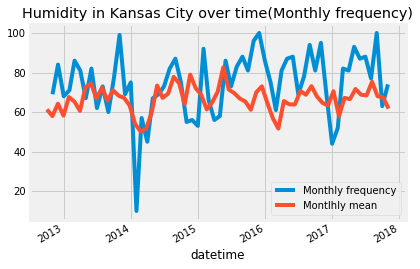

In [339]:
humidity["Kansas City"].asfreq('M').plot(label='Monthly frequency') # Converts to monthly frequency
humidity["Kansas City"].resample('30D').mean().plot(label='Montlhly mean') # Converts to monthly frequency, takes the mean
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.legend()
plt.show()

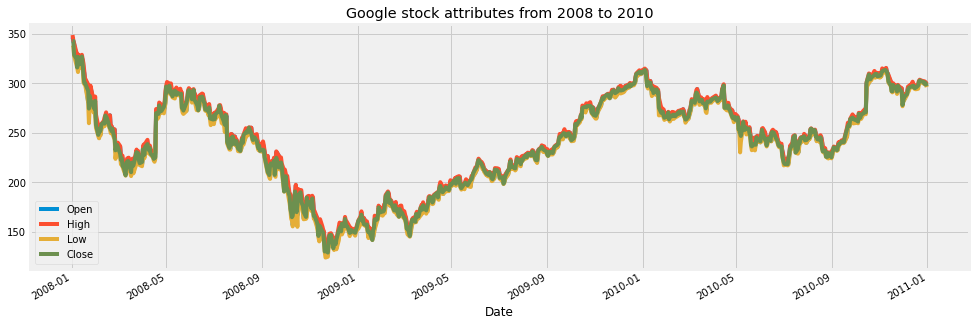

In [340]:
google['2008':'2010'][['Open','High','Low','Close']].plot(subplots=False, figsize=(15,5))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

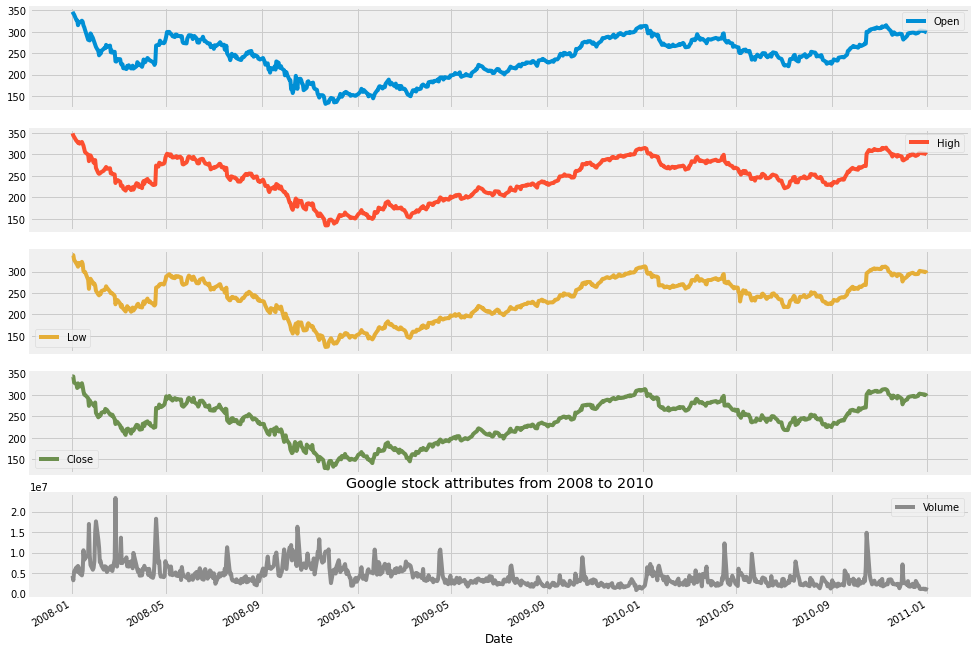

In [341]:
google['2008':'2010'].plot(subplots=True, figsize=(15,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

## <a id='1.4'>1.4 Shifting and lags</a>
[Table of Contents](#0.1)

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time-series with a past of itself

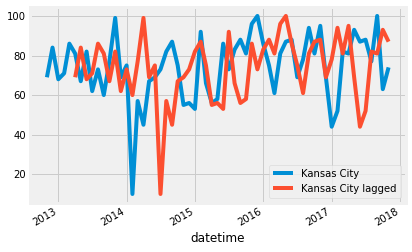

In [342]:
humidity["Kansas City"].asfreq('M').plot(legend=True)
shifted = humidity["Kansas City"].asfreq('M').shift(5).plot(legend=True) # Shifted by 5 months
shifted.legend(['Kansas City','Kansas City lagged'])
plt.show()

## <a id='#1.5'>1.5 Resampling</a>
[Table of Contents](#0.1)
- **Upsampling** - Time-series is resampled from low frequency to high frequency (e.g. Monthly to daily frequency). It involves filling or interpolating missing data

- **Downsampling** - Time-series is resampled from high frequency to low frequency (e.g. Weekly to monthly frequency). It involves aggregation of existing data


In [343]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure = pressure.fillna(method='bfill')
pressure.head(3)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


First, we used **ffill** parameter which propagates last valid observation to fill gaps. Then we use **bfill** to propogate next valid observation to fill gaps.

In [344]:
# Shape before resampling(downsampling)
pressure.shape

(45252, 36)

In [345]:
# We downsample from hourly to 3 day frequency aggregated using mean
pressure = pressure.resample('3D').mean()
# Shape after resampling(downsampling)
pressure.shape

(629, 36)

Much less rows are left. Now, we will upsample from 3 day frequency to daily frequency

In [346]:
pressure = pressure.resample('D').pad()
# Shape after resampling(upsampling)
pressure.shape

(1885, 36)

Again an increase in number of rows. Resampling is cool when used properly.

# <a id='2'>2. Finance and statistics</a>
[Table of Contents](#0.1)

## <a id='2.1'>2.1 Percent change</a>
[Table of Contents](#0.1)

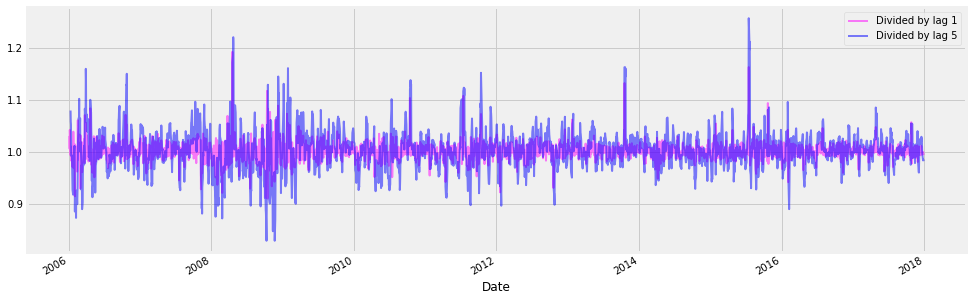

In [347]:
# Divide values in time-series with lagged version of itself by 1 period
plt.figure(figsize=(15,5))
google['Change1'] = google.High.div(google.High.shift(1)) 
google['Change1'].plot(lw=2, ls='solid', color='magenta', alpha=0.5, label='Divided by lag 1')
google['Change5'] = google.High.div(google.High.shift(5)) 
google['Change5'].plot(lw=2, ls='solid', color='blue', alpha=0.5, label='Divided by lag 5')
plt.legend()
plt.show()

## <a id='2.2'>2.2 Stock returns</a> 
[Table of Contents](#0.1)

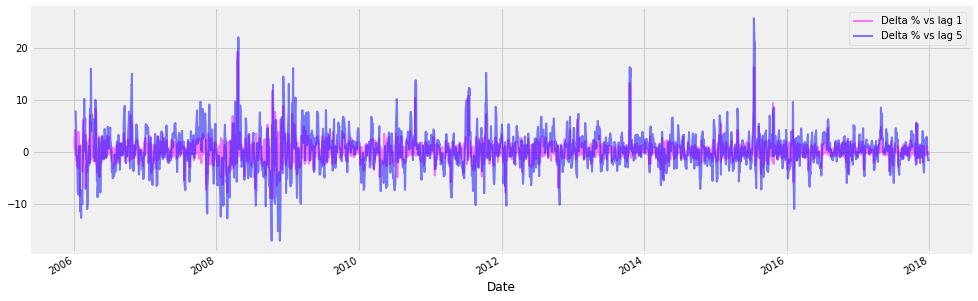

In [348]:
plt.figure(figsize=(15,5))
google['Return1'] = google.Change1.sub(1).mul(100)
google['Return1'].plot(lw=2, ls='solid', color='magenta', alpha=0.5, label='Delta % vs lag 1')
google['Return5'] = google.Change5.sub(1).mul(100)
google['Return5'].plot(lw=2, ls='solid', color='blue', alpha=0.5, label='Delta % vs lag 5')
plt.legend()
plt.show()

Similarly:

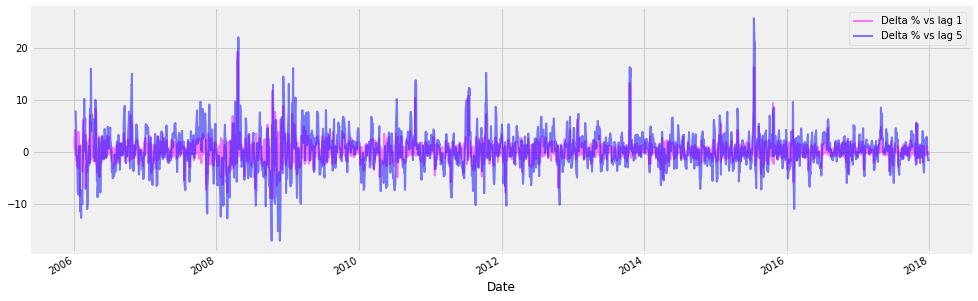

In [349]:
plt.figure(figsize=(15,5))
google.High.pct_change(1).mul(100).plot(lw=2, ls='solid', color='magenta', alpha=0.5, label='Delta % vs lag 1')
google.High.pct_change(5).mul(100).plot(lw=2, ls='solid', color='blue', alpha=0.5, label='Delta % vs lag 5')
plt.legend()
plt.show()

## <a id='2.3'>2.3 Comparing two or more time-series</a> 
[Table of Contents](#0.1)

Comparison between two or more time-series is achieved by dividing each time-series element of all time series by the first element. This way both series start at the same point and can be easily compared.

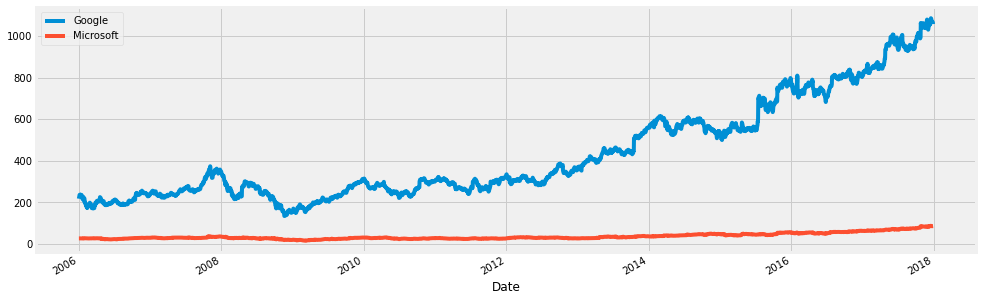

In [350]:
# Plotting before normalization
plt.figure(figsize=(15,5))
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

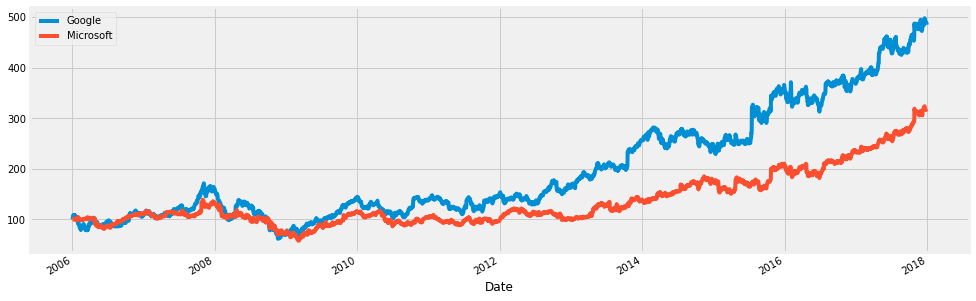

In [351]:
# Normalizing and comparison, divide both time-series by their first value
# Set first value of normalized time-series to 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)

plt.figure(figsize=(15,5))
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

Google outperforms Microsoft over time.

## <a id='2.4'>2.4 Window functions</a>
[Table of Contents](#0.1)

Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

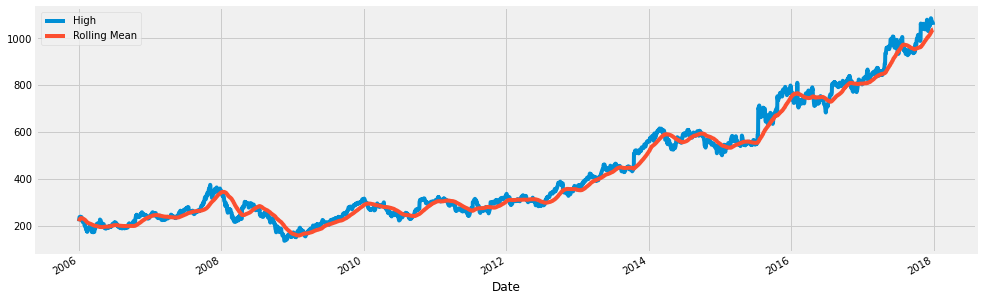

In [352]:
# Rolling window functions
rolling_google = google.High.rolling('90D').mean()

plt.figure(figsize=(15,5))
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

Now, observe that rolling mean plot is a smoother version of the original plot.

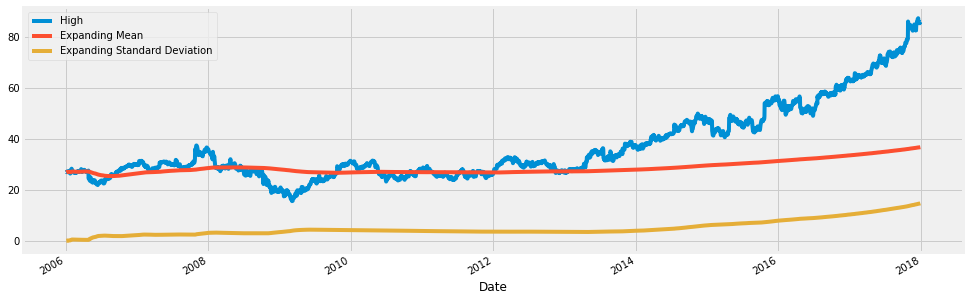

In [353]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()

plt.figure(figsize=(15,5))
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## <a id='2.5'>2.5 OHLC charts</a>
[Table of Contents](#0.1)

An Open-high-low-close (OHLC) chart is any type of price chart that shows the open, high, low and close price of a certain time period. 
- Used as a trading tool to visualise the price changes over time for securities, currencies, stocks, bonds, commodities, etc.
- Useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced
- The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. 
- On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). 
- On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.
- Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened).

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

In [354]:
# OHLC chart of June 2008
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [355]:
# OHLC chart of 2008
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [356]:
# OHLC chart of 2008
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

 ## <a id='2.6'>2.6 Candlestick charts</a>
 [Table of Contents](#0.1)
 
- Used as a trading tool to visualise and analyse the price movements over time for securities, derivatives, currencies, stocks, bonds, commodities, etc. 
- Candlestick Charts display multiple bits of price information such as the open price, close price, highest price and lowest price through the use of candlestick-like symbols. 
- Each symbol represents the compressed trading activity for a single time period (a minute, hour, day, month, etc). Each Candlestick symbol is plotted along a time scale on the x-axis, to show the trading activity over time.
- The main rectangle in the symbol is known as the real body, which is used to display the range between the open and close price of that time period. While the lines extending from the bottom and top of the real body is known as the lower and upper shadows (or wick). Each shadow represents the highest or lowest price traded during the time period represented. 
- When the market is Bullish (the closing price is higher than it opened), then the body is coloured typically white or green. But when the market is Bearish (the closing price is lower than it opened), then the body is usually coloured either black or red.
- Candlestick Charts are great for detecting and predicting market trends over time and are useful for interpreting the day-to-day sentiment of the market, through each candlestick symbol's colouring and shape. For example, the longer the body is, the more intense the selling or buying pressure is. While, a very short body, would indicate that there is very little price movement in that time period and represents consolidation.
- Candlestick Charts help reveal the market psychology (the fear and greed experienced by sellers and buyers) through the various indicators, such as shape and colour, but also by the many identifiable patterns that can be found in Candlestick Charts. 
- In total, there are 42 recognised patterns that are divided into simple and complex patterns. These patterns found in Candlestick Charts are useful for displaying price relationships and can be used for predicting the possible future movement of the market.
- Candlestick Charts don't express the events taking place between the open and close price - only the relationship between the two prices. So you can't tell how volatile trading was within that single time period.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

In [357]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [358]:
# Candlestick chart of 2008
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [359]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

## <a id='2.7'>2.7 Autocorrelation and Partial Autocorrelation</a>
[Table of Contents](#0.1)

- **Autocorrelation** - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
- **Partial Autocorrelation** - The partial autocorrelation function can be interpreted as a regression of the series against its past lags.  The terms can be interpreted the same way as a standard  linear regression, that is the contribution of a change in that particular lag while holding others constant. 


## Autocorrelation

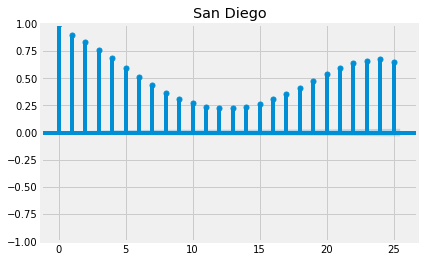

In [360]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

 As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

## Partial Autocorrelation

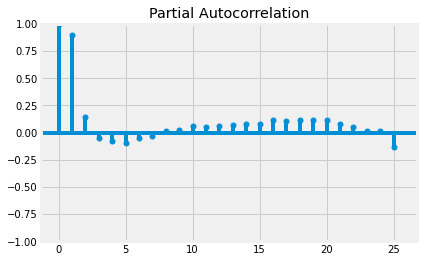

In [361]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

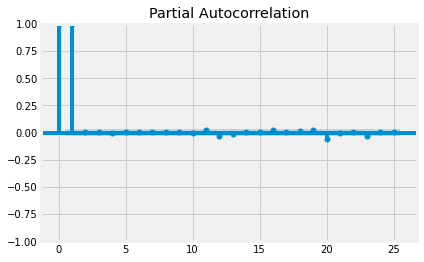

In [362]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"],lags=25)
plt.show()

Here, only 0th, 1st and 20th lag are statistically significant.

# <a id='3'>3. Time-series decomposition and Random walks</a>
[Table of Contents](#0.1)

## <a id='3.1'>3.1. Trends, seasonality and noise</a>
[Table of Contents](#0.1)

These are the components of a time series
- **Trend** - Consistent upwards or downwards slope of a time series
- **Seasonality** - Clear periodic pattern of a time series(like sine funtion)
- **Noise** - Outliers or missing values

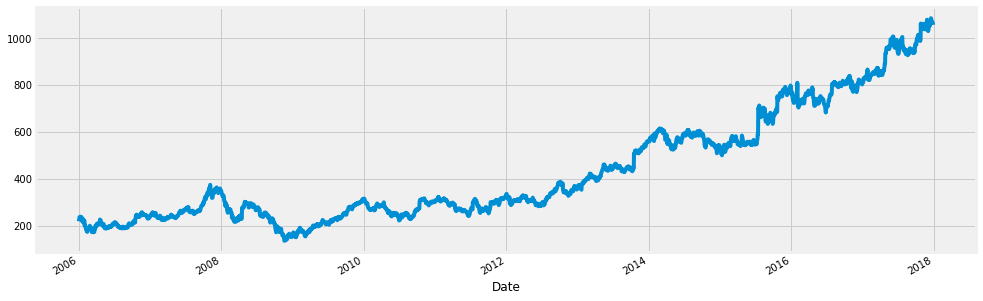

In [363]:
# Let's take Google stocks High for this
plt.figure(figsize=(15,5))
google["High"].plot()
plt.show()

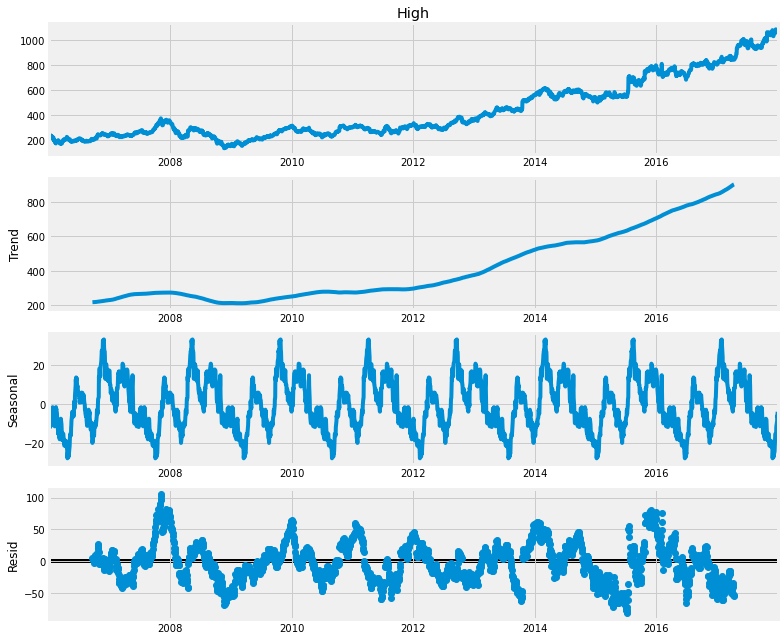

In [364]:
# Decompose the time-series (if not specified, model='additive')
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],period=365) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

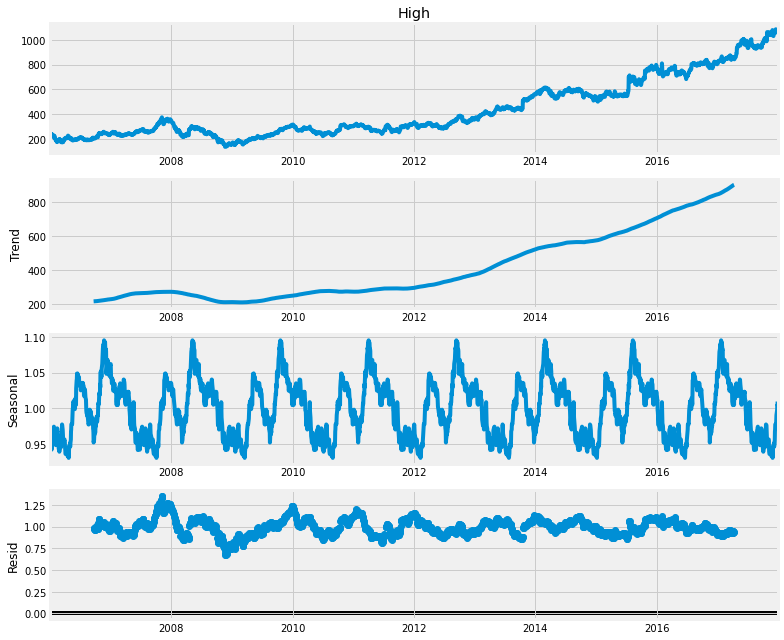

In [365]:
# Decompose the time-series (if not specified, model='additive')
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"], model='multiplicative', period=365) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values
* Multiplicative is better than Additive model due to low residuals

## <a id='3.2'>3.2. White noise</a>
[Table of Contents](#0.1)

White noise features: 
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

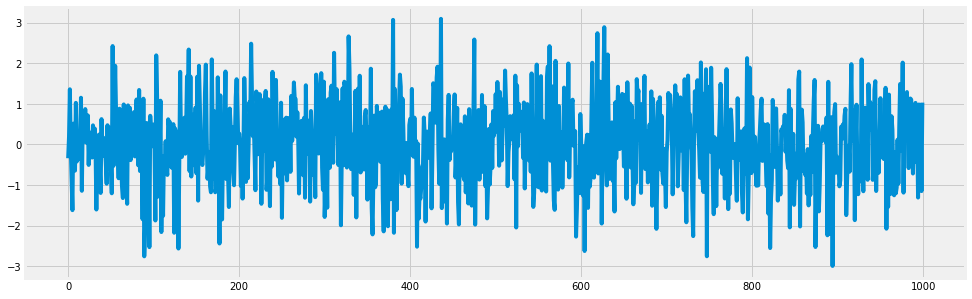

In [366]:
# Plotting white noise
rcParams['figure.figsize'] = 15,5
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)
plt.show()

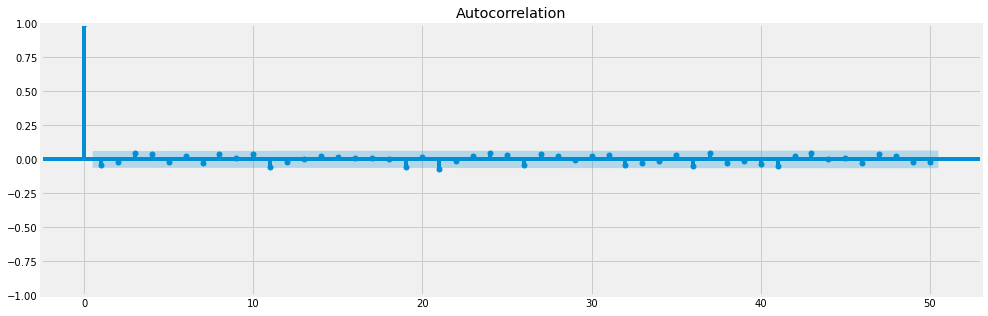

In [367]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=50)
plt.show()

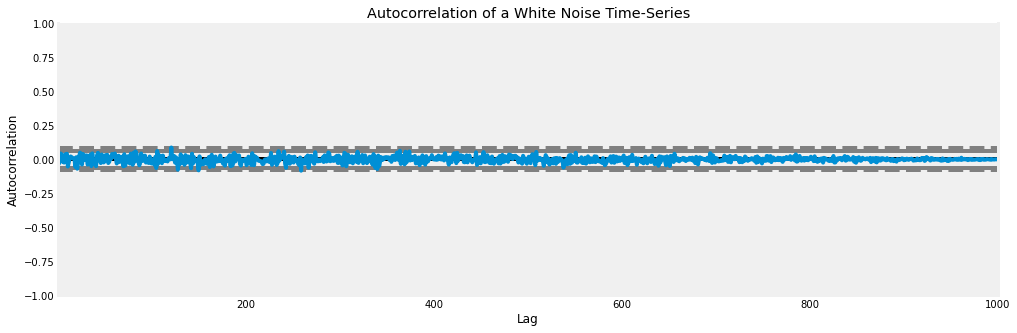

In [368]:
plt.figure(figsize=(15,5))
plt.title('Autocorrelation of a White Noise Time-Series')
autocorrelation_plot(white_noise)
plt.show()

All lags are statistically insigficant as they lie inside the confidence interval (shaded portion).

## <a id='3.3'>3.3. Random Walk</a>
[Table of Content](#0.1)

A random walk is a stochastic or random process that describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub> 

Random walks can't be forecasted because the noise component is random.

One could test if 
# Z<sub>t</sub> = P<sub>t</sub> - P<sub>t-1</sub> = ε<sub>t</sub>
is stationary

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time-series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [369]:
# Augmented Dickey-Fuller test on close prices of google and microsoft stocks 
adf = adfuller(microsoft["Close"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Close"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.9988575993461946
p-value of google: 0.9967315857800989


The p-values of both Close prices time-series are higher than e.g. 0.05, therefore we can't reject the null hypothesis, the two time-series are non-stationaries, they are not random walks (unit root exist)

In [370]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.000320152527765226
p-value of google: 6.510719605768313e-07


As both google and microsoft volume time-series have p-value from ADF Test less than 0.05, the null hypothesis is rejected and they are stationaries, therefore they might be random walks (unit root doesn't exist)

### Generating a random walk

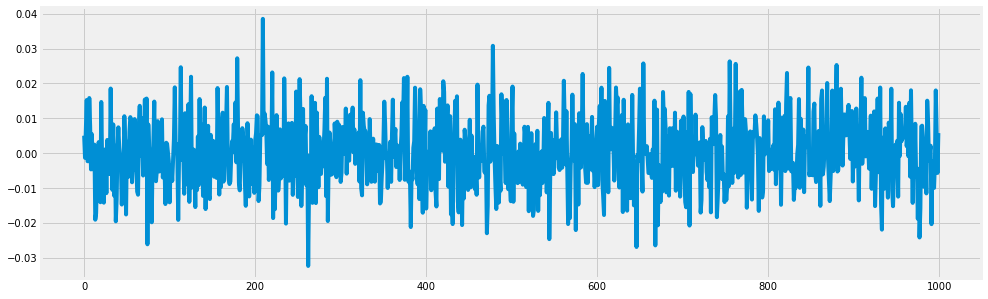

In [371]:
seed(42)
rcParams['figure.figsize'] = 15,5
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [372]:
adf = adfuller(random_walk)
print("p-value of random walk: {}".format(float(adf[1])))

p-value of random walk: 0.0


This is clearly a random walk, p-value is 0, null hypothesis is rejected, unit root doesn't exist and the time-series is stationary

In [373]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

## <a id='3.4'>3.4 Stationarity</a>
[Table of Contents](#0.1)

A stationary time-series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
- **Strong stationarity**:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
- **Weak stationarity**: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as  non-stationary series that depend on time have too many parameters to account for when modelling the time-series. diff() method can easily convert a non-stationary series to a stationary series.

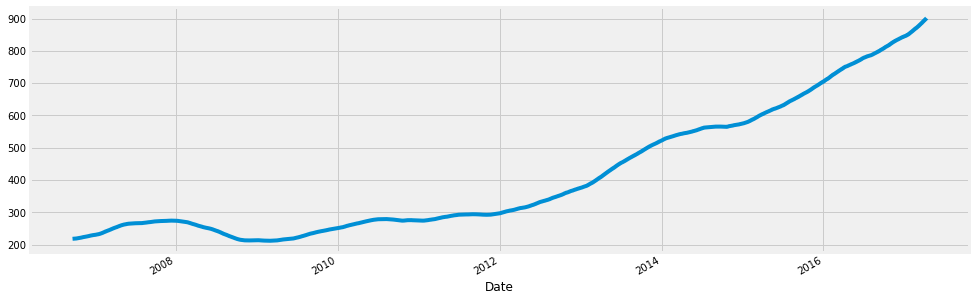

In [374]:
# The original non-stationary plot
plt.figure(figsize=(15,5))
decomposed_google_volume.trend.plot()
plt.show()

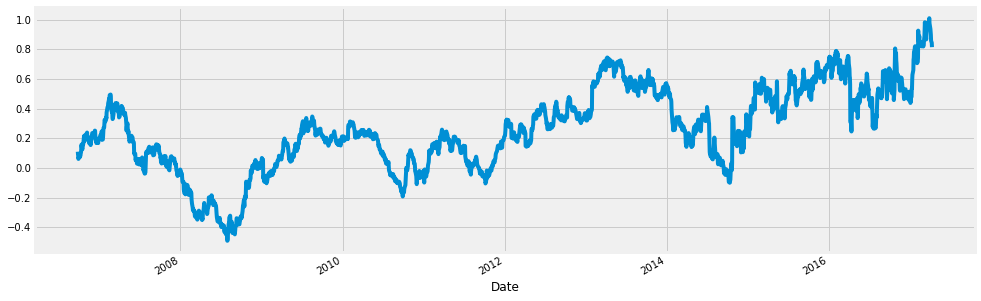

In [375]:
# The new stationary plot
plt.figure(figsize=(15,5))
decomposed_google_volume.trend.diff().plot()
plt.show()

# <a id='4'>4. Modelling using statstools</a>
[Table of Contents](#0.1)

## <a id='4.1'>4.1 AR models</a>
[Table of Contents](#0.1)

 An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.
 #### AR(1) model
 R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>
 For an AR(1) process with a positive ϕ , only the previous term in the process and the noise term contribute to the output. If ϕ is close to 0, then the process still looks like white noise, but as ϕ approaches 1, the output gets a larger contribution from the previous term relative to the noise. This results in a "smoothing" or integration of the output, similar to a low pass filter.

 ##### As RHS has only one lagged value (R<sub>t-1</sub>) this is called AR model of order 1 where μ is mean and ε is noise at time t
 If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. 
 
 #### AR(2) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 
 For an AR(2) process, the previous two terms and the noise term contribute to the output. If both ϕ<sub>1</sub> and ϕ<sub>2</sub> are positive, the output will resemble a low pass filter, with the high frequency part of the noise decreased. If ϕ<sub>1</sub> is positive while ϕ<sub>2</sub> is negative, then the process favors changes in sign between terms of the process. The output oscillates. This can be likened to edge detection or detection of change in direction.
 
 #### AR(3) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>
 
 and so on.
 
 Reference: https://en.wikipedia.org/wiki/Autoregressive_model

## Simulating AR(1) model

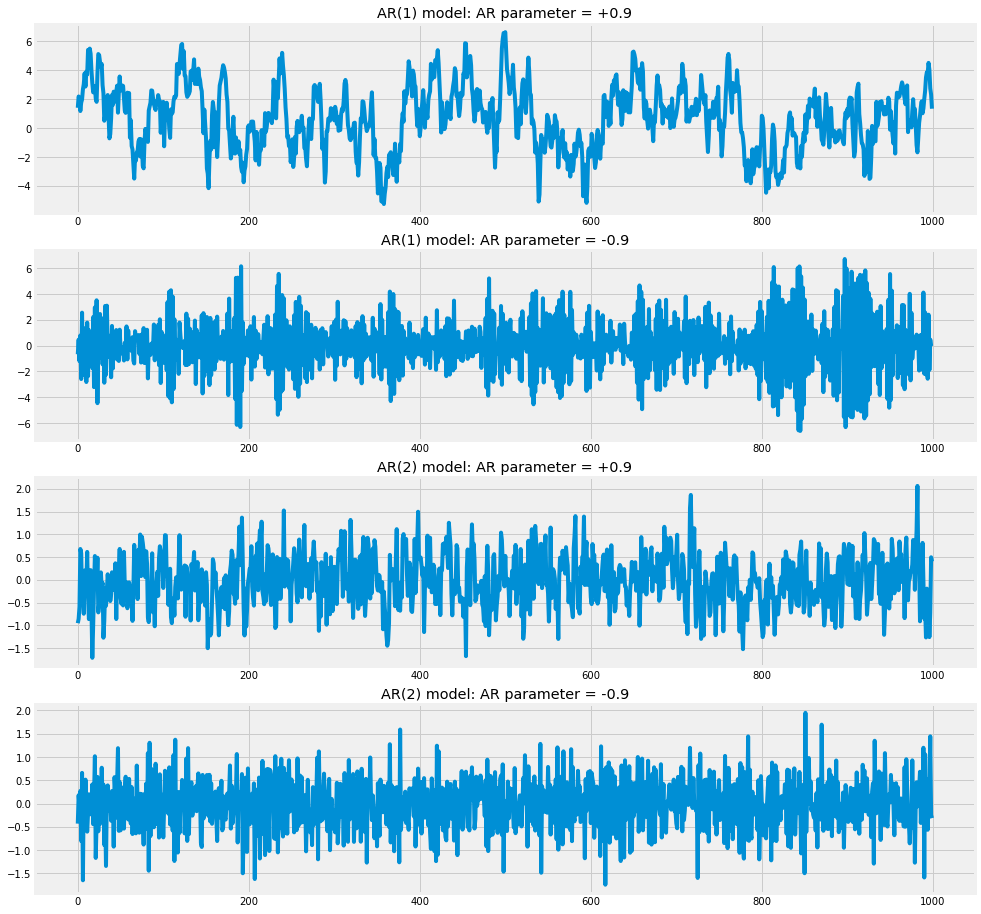

In [376]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 15,16
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

### Forecasting a simulated model

In [377]:
model = ARIMA(sim1, order=(1,0,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1415.701
Date:                Sat, 22 Apr 2023   AIC                           2837.403
Time:                        23:00:16   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.293      2.417      0.016       0.134       1.281
ar.L1          0.8916      0.015     60.958      0.000       0.863       0.920
sigma2         0.9920      0.044     22.667      0.0

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

### Predicting the model

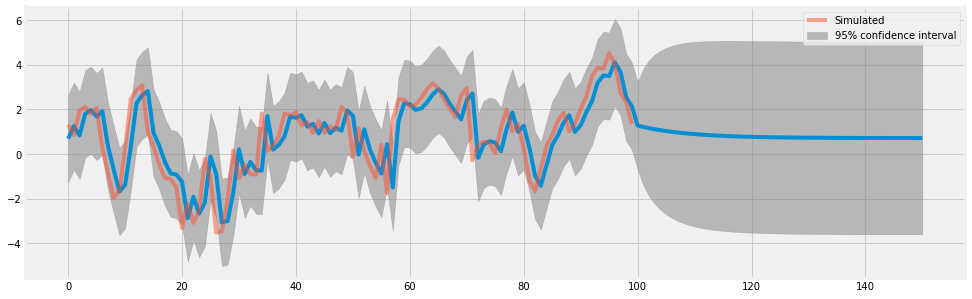

In [396]:
# Predicting simulated AR(1) model 
rcParams['figure.figsize'] = 15,5
plot_predict(result, start=900, end=1050) # start: first forecast point
plt.plot(sim1[900:], alpha=0.5, label='Simulated')
plt.legend()
plt.show()

It seems to be working pretty well on a simulated time-series using AR(1). How does it work on the google stock prices?

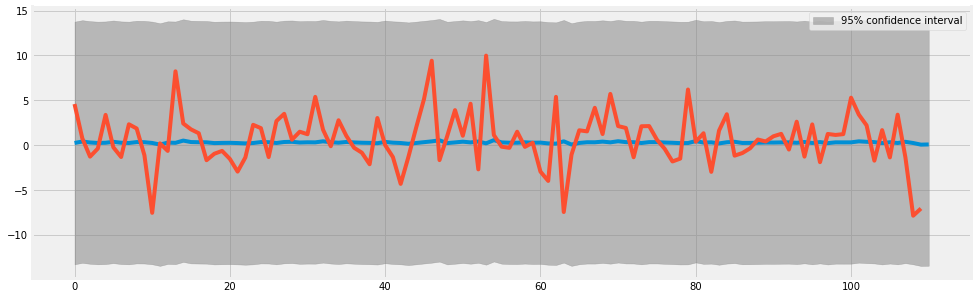

In [415]:
# Predicting closing prices of google
model = ARIMA(google["Close"].diff().iloc[1:].values, order=(1,0,0))
res = model.fit()
plot_predict(res, start=900, end=1010)
plt.plot(google["Close"].diff().iloc[1:].values[900:1010])
plt.show()

Not really well, the predicted time-series doesn't have much detail

## <a id='4.2'>4.2 MA models</a>
[Table of Contents](#0.1)

The moving-average (MA) model is a common approach for modeling univariate time-series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.
#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub>1 + θϵ<sub>t-1</sub>

It translates to Today's returns = mean + today's noise + yesterday's noise
##### As there is only 1 lagged value in RHS, it is an MA model of order 1

## Simulating MA(1) model

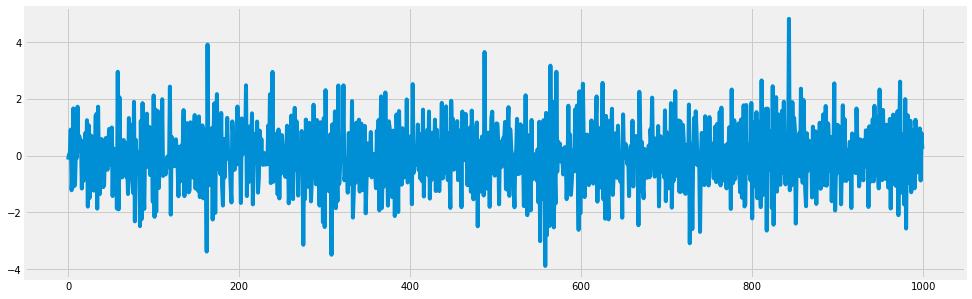

In [416]:
rcParams['figure.figsize'] = 15,5
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)

plt.figure(figsize=(15,5))
plt.plot(sim1)
plt.show()

### Forecasting the sumulated MA model

In [418]:
model = ARIMA(sim1, order=(0,0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1441.225
Date:                Sat, 22 Apr 2023   AIC                           2888.450
Time:                        23:10:41   BIC                           2903.174
Sample:                             0   HQIC                          2894.046
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.016     -0.220      0.826      -0.036       0.028
ma.L1         -0.4969      0.028    -17.647      0.000      -0.552      -0.442
sigma2         1.0453      0.043     24.158      0.0

### Predicting using MA model

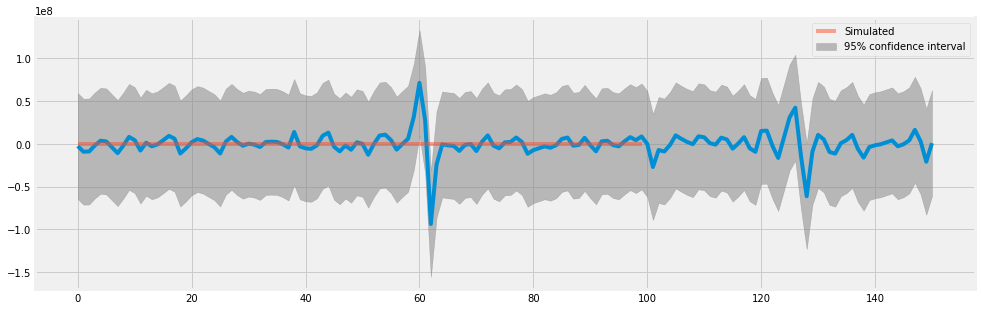

In [440]:
# Predicting simulated MA(1) model 
rcParams['figure.figsize'] = 15,5
plot_predict(result, start=900, end=1050) # start: first forecast point
plt.plot(sim1[900:], alpha=0.5, label='Simulated')
plt.legend()
plt.show()

## <a id='4.3'>4.3 ARMA models</a>
[Table of Contents](#0.1)

Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.
### ARMA(1,1) model = ARIMA(1,0,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

## Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

In [422]:
# Forecasting and predicting microsoft stocks volume
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,0,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -55411.375
Date:                Sat, 22 Apr 2023   AIC                         110838.750
Time:                        23:16:03   BIC                         110886.849
Sample:                             0   HQIC                        110856.046
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   1.12e+04     -1.811      0.070   -4.23e+04    1667.175
ar.L1          0.0936      0.945      0.099      0.921      -1.759       1.947
ar.L2          0.8902      1.025      0.868      0.3

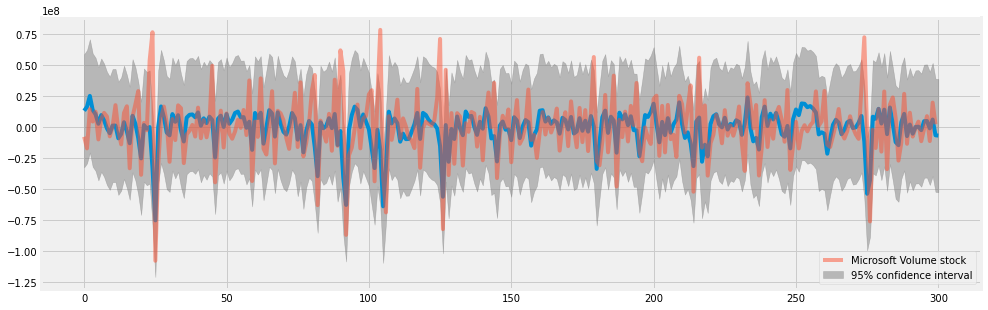

In [434]:
rcParams['figure.figsize'] = 15,5
plot_predict(result, start=1000, end=1300)
plt.plot(microsoft["Volume"].diff().iloc[1:].values[1000:1300], alpha=0.5, label='Microsoft Volume stock')
plt.legend()
plt.show()

In [435]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1301].values, result.predict(start=1000,end=1300)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 35048360.54620467.


ARMA model shows much better results than AR and MA models.

## <a id='4.4'>4.4 ARIMA models</a>
[Table of Contents](#0.1)

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.
ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter
### ARIMA(1,0,0) = AR(1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1) = ARMA(1,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

## Prediction using ARIMA model

In [437]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 15,5
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.152
Date:                Sat, 22 Apr 2023   AIC                         112776.303
Time:                        23:22:19   BIC                         112794.339
Sample:                             0   HQIC                        112782.789
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8715      0.003   -258.467      0.000      -0.878      -0.865
ar.L2         -0.4549      0.007    -61.690      0.000      -0.469      -0.440
sigma2      1.001e+15        nan        nan        n

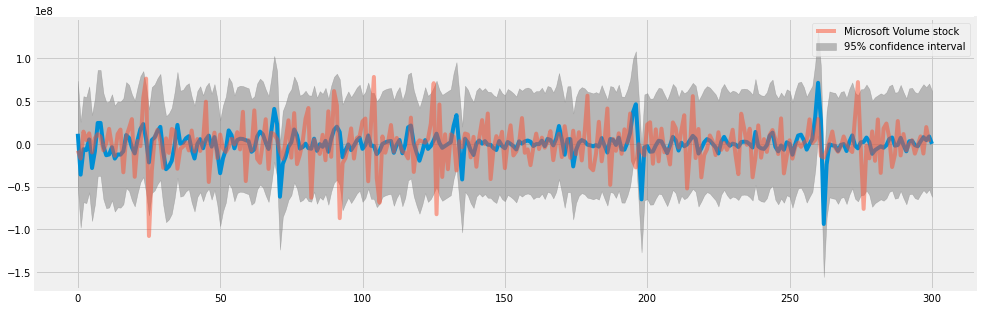

In [438]:
rcParams['figure.figsize'] = 15,5
plot_predict(result, start=700, end=1000)
plt.plot(microsoft["Volume"].diff().iloc[1:].values[1000:1300], alpha=0.5, label='Microsoft Volume stock')
plt.legend()
plt.show()

In [439]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 33814021.136790946.


Taking the slight lag into account, this is a fine model.

## <a id='4.5'>4.5 VAR models</a>
[Table of Contents](#0.1)

Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time-series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.173
                          + intercept   AIC                          24404.346
Date:                Sat, 22 Apr 2023   BIC                          24506.556
Time:                        23:24:39   HQIC                         24441.100
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):   48246.21, 14926.98
Prob(Q):                        0.99, 1.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

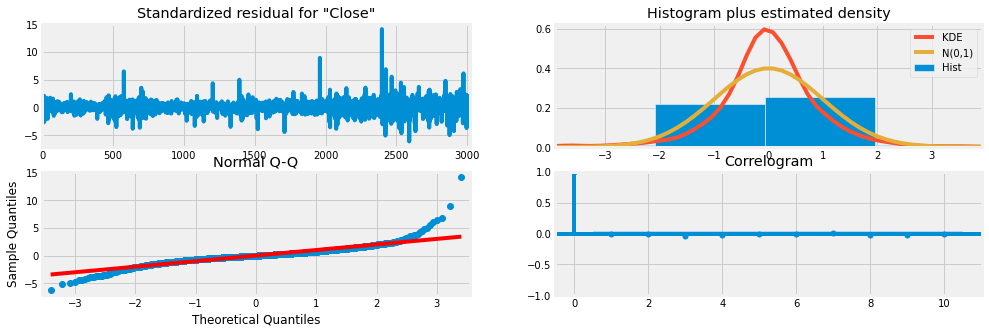

In [441]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## <a id='4.6'>4.6 State Space methods</a>
[Table of Contents](#0.1)

A general state space model is of the form

y<sub>t</sub>=Z<sub>t</sub>α<sub>t</sub>+d<sub>t</sub>+ε<sub>t</sub>

α<sub>t</sub>=T<sub>t</sub>α<sub>t</sub>−1+c<sub>t</sub>+R<sub>t</sub>η<sub>t</sub>

where y<sub>t</sub> refers to the observation vector at time t, α<sub>t</sub> refers to the (unobserved) state vector at time t, and where the irregular components are defined as

ε<sub>t</sub>∼N(0,H<sub>t</sub>)

η<sub>t</sub>∼N(0,Q<sub>t</sub>)

The remaining variables (Z<sub>t</sub>,d<sub>t</sub>,H<sub>t</sub>,T<sub>t</sub>,c<sub>t</sub>,R<sub>t</sub>,Q<sub>t</sub>) in the equations are matrices describing the process. Their variable names and dimensions are as follows

Z : design (k_endog×k_states×nobs)

d : obs_intercept (k_endog×nobs)

H : obs_cov (k_endog×k_endog×nobs)

T : transition (k_states×k_states×nobs)

c : state_intercept (k_states×nobs)

R : selection (k_states×k_posdef×nobs)

Q : state_cov (k_posdef×k_posdef×nobs)

In the case that one of the matrices is time-invariant (so that, for example, Z<sub>t</sub>=Z<sub>t</sub>+1 ∀ <sub>t</sub>), its last dimension may be of size 1 rather than size nobs.

This generic form encapsulates many of the most popular linear time series models (see below) and is very flexible, allowing estimation with missing observations, forecasting, impulse response functions, and much more.

Source: [statsmodels](https://www.statsmodels.org/dev/statespace.html)

## <a id='4.6.1'>4.6.1 SARIMA models</a>
[Table of Contents](#0.1)

SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10098.450
Date:                Sat, 22 Apr 2023   AIC                          20216.901
Time:                        23:25:57   BIC                          20277.024
Sample:                             0   HQIC                         20238.520
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1001      0.048      2.095      0.036       0.006       0.194
ar.L1          0.2294      0.006     37.244      0.000       0.217       0.242
ar.L2          1.1233      0.005    221.892      0.0

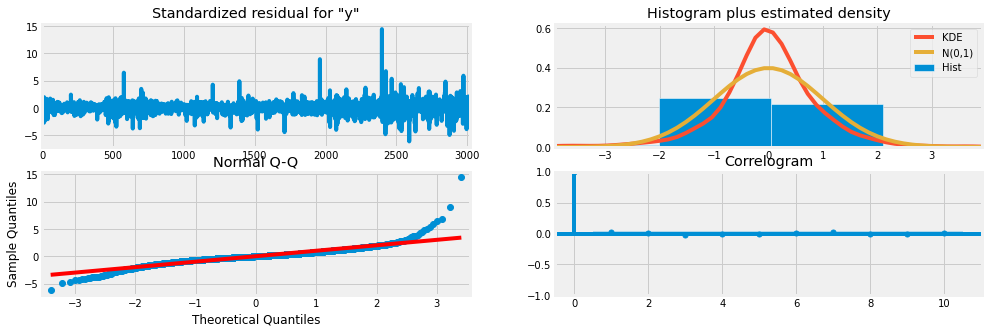

In [442]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

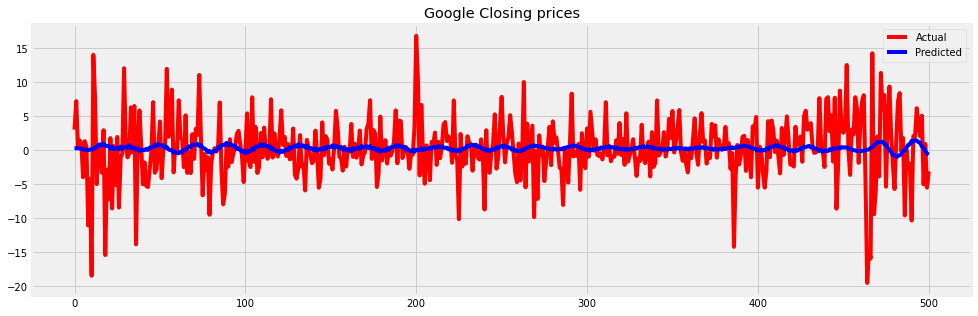

In [443]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## <a id='4.6.2'>4.6.2 Unobserved components</a>
[Table of Contents](#0.1)

A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. The following model shows a possible scenario:
<img src="http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/images/etsug_ucm0134.png">
Source: [http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm](http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm)

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Sat, 22 Apr 2023   AIC                          20237.023
Time:                        23:26:41   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (L1) (Q):         

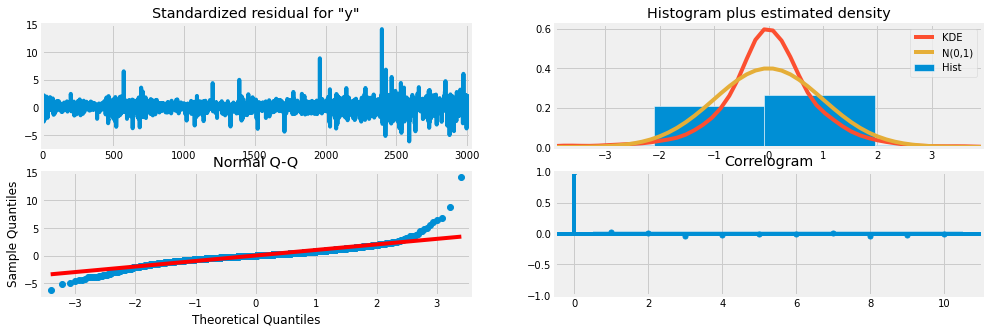

In [444]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

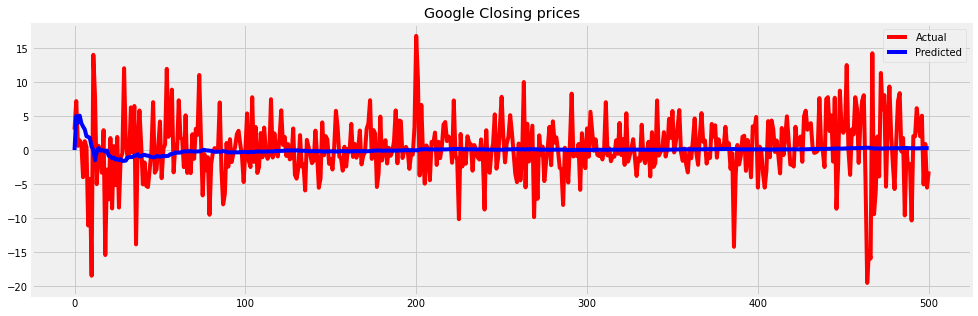

In [445]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

## <a id='4.6.3'>4.6.3 Dynamic Factor models</a>
[Table of Contents](#0.1)

Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12197.974
Date:                               Sat, 22 Apr 2023   AIC                          24407.948
Time:                                       23:27:07   BIC                          24444.022
Sample:                                            0   HQIC                         24420.919
                                              - 3018                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):             4.01, 0.57   Jarque-Bera (JB):   49450.40, 15108.78
Prob(Q):                        0.05, 0.45   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.38, 1.63   Skew:                      1.14, -0

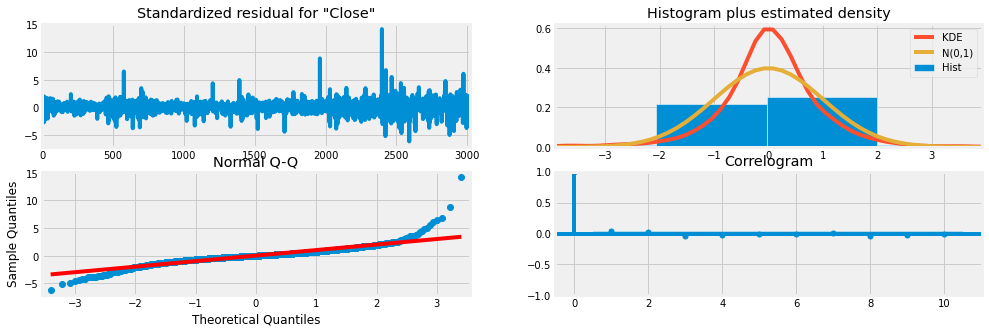

In [446]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

References and influences (These have more in-depth content and explanations): 
* [Manipulating Time Series Data in Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)
* [Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python)
* [Visualizing Time Series Data in Python](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)
* [VAR models and LSTM](https://www.youtube.com/watch?v=_vQ0W_qXMxk)
* [State space models](https://www.statsmodels.org/dev/statespace.html)